# Housing and Home Building Stock Analysis

## List of Stock to Analyze  
### CareTrust REIT, Inc. (CTRE)  
### The Home Depot, Inc. (HD)  
### Lennar Corporation (LEN)  
### LGI Homes, Inc. (LGIH)  
### Lowe's Companies, Inc. (LOW)  
### NVR, Inc. (NVR)  

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import math
import statistics
from tabulate import tabulate
import scipy
from scipy.stats import norm

import os
import sys
import platform

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("seaborn: ", sns.__version__)
print("yfinance: ", yf.__version__)
print("os system: ", os.name)
print("Python Version:", sys.version)
print("Platform System: ", platform.system())

numpy:  1.19.5
pandas:  1.1.5
matplotlib:  3.3.4
seaborn:  0.11.2
yfinance:  0.1.63
os system:  nt
Python Version: 3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
Platform System:  Windows


In [3]:
# input
symbols = ['LOW', 'LGIH', 'LEN', 'NVR', 'HD', 'CTRE']
start = '2017-01-01'
end = '2022-09-02'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,CTRE,HD,LEN,LGIH,LOW,NVR
Date,,,,,,
2017-01-03,11.292927,117.371330,40.423515,28.790001,64.036896,1649.989990
2017-01-04,11.558993,118.411255,41.421867,29.170000,64.813095,1678.770020
2017-01-05,11.507258,117.013008,41.836262,29.709999,64.145180,1689.400024
2017-01-06,11.499867,116.689674,41.148724,29.629999,64.036896,1678.099976
2017-01-09,11.374228,117.371330,41.016872,28.930000,64.145180,1681.500000


In [4]:
df.tail()

,CTRE,HD,LEN,LGIH,LOW,NVR
Date,,,,,,
2022-08-26,21.352598,296.167603,80.330002,96.589996,200.990005,4224.990234
2022-08-29,21.451088,294.399139,79.900002,96.680000,201.070007,4213.049805
2022-08-30,21.135918,291.200012,78.919998,96.150002,197.220001,4156.529785
2022-08-31,21.214712,288.420013,77.449997,94.910004,194.139999,4140.060059
2022-09-01,20.909391,293.369995,77.489998,92.730003,195.759995,4116.660156


In [5]:
Number_of_Stocks = len(symbols)
Number_of_Stocks

6

In [6]:
# sort the list
symbols.sort()

# display the sorted words
print("Companies in alphabetic order:")
for sym in symbols:
   print(sym)

Companies in alphabetic order:
CTRE
HD
LEN
LGIH
LOW
NVR


In [7]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
5 years


In [8]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

68

In [9]:
days = (df.index[-1] - df.index[0]).days
days

2067

In [10]:
delta = d1 - d2
r = relativedelta.relativedelta(d1, d2)
years = relativedelta.relativedelta(d2,d1).years
months = (r.months + (12*r.years))


print("Years of Investing: %s" % years)
print("Months of Investing: %s" % -months)
print("Days of Investing: %s" % -delta.days)

Years of Investing: 5
Months of Investing: 68
Days of Investing: 2070


In [11]:
d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")

diff = relativedelta.relativedelta(d2, d1)

years = diff.years
months = diff.months
days = diff.days

print('{} years {} months {} days'.format(years, months, days))

5 years 8 months 1 days


In [12]:
returns_array = df.to_numpy()

R_mean=np.zeros(6)

returns_array2=np.zeros((1427,6))

nan_array= np.isnan(returns_array)    
not_nan_array = ~ nan_array
for index in range(6):
    returns_array2[:,index] = returns_array[not_nan_array[:,index]][:,index]
    
    R_mean[index]=statistics.mean(returns_array2[:,index])
print(R_mean)
#print(df.head(0))
print(returns_array2.shape)

[  16.92764245  222.73454566   64.77076928   85.07336368  128.68070113
 3583.30887254]
(1427, 6)


array([[<AxesSubplot:title={'center':'CTRE'}>,
        <AxesSubplot:title={'center':'HD'}>],
       [<AxesSubplot:title={'center':'LEN'}>,
        <AxesSubplot:title={'center':'LGIH'}>],
       [<AxesSubplot:title={'center':'LOW'}>,
        <AxesSubplot:title={'center':'NVR'}>]], dtype=object)

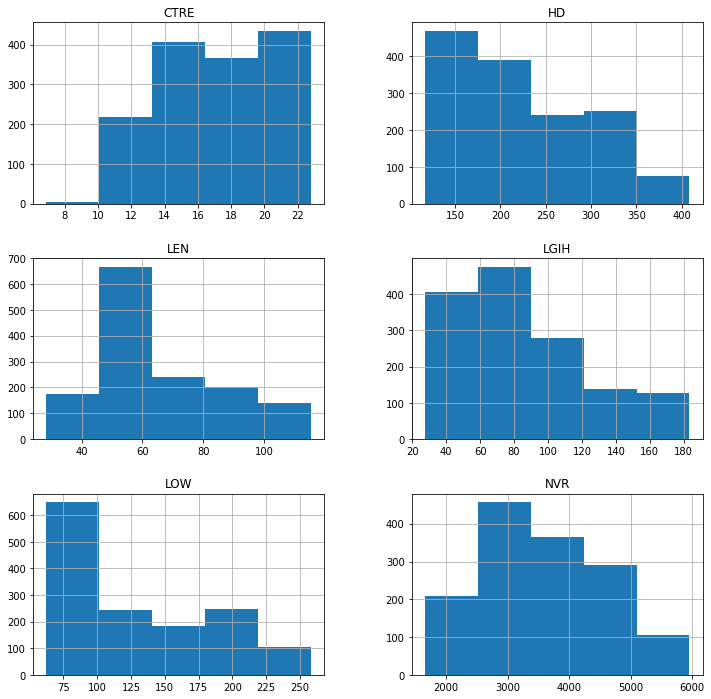

In [13]:
df.hist(bins=5, figsize=(12,12))

[  11.39395603 5148.05133722  408.93687824 1510.80391099 2824.95115348
    0.        ]


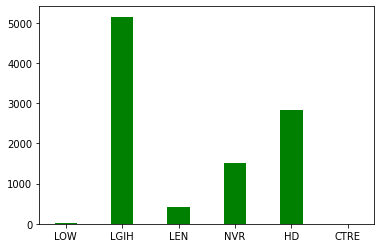

In [14]:
variances=np.zeros(6)
covarances=np.zeros(6)

for j in range(5):
    variances[j]=statistics.variance(returns_array2[:,j])
    covarances=np.cov(returns_array2[:,0],returns_array2[:,0])[0,1]  
covariances_M=np.cov(returns_array2.T)
limit_float = np.round(covariances_M, 3)
#print(returns_array2.T)
print(variances.T)

y=['LOW', 'LGIH', 'LEN', 'NVR', 'HD', 'CTRE']

fig = plt.figure()
plt.bar(y,variances.T, color ='green',
        width = 0.4)
plt.show()

In [15]:
print('Percentage of invest:')
Cash = 100000
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    percentages = (round(cost,3)/Cash)*100
    print('{}: {}%'.format(i, percentages))

Percentage of invest:
CTRE: 17.0%
HD: 17.0%
LEN: 17.0%
LGIH: 17.0%
LOW: 17.0%
NVR: 17.0%


In [16]:
print('Number of Shares:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
CTRE: 1505
HD: 144
LEN: 420
LGIH: 590
LOW: 265
NVR: 10


In [17]:
print('Beginning Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
CTRE: $16995.85
HD: $16901.47
LEN: $16977.88
LGIH: $16986.1
LOW: $16969.78
NVR: $16499.9


In [18]:
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
CTRE: $31468.63
HD: $42245.28
LEN: $32545.8
LGIH: $54710.7
LOW: $51876.4
NVR: $41166.6


In [19]:
print('Short Selling')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Short Selling
Current Value:
CTRE: $9181.15
HD: $6690.17
LEN: $8852.75
LGIH: $5268.57
LOW: $5507.17
NVR: $6599.96


In [20]:
short_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    short_result.append(Current_Value)
print('Total Value of Shorting: $%s' % round(sum(short_result),2))

Total Value of Shorting: $42099.77


In [21]:
print('Buy Long')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Buy Long
Current Value:
CTRE: $31468.63
HD: $42245.28
LEN: $32545.8
LGIH: $54710.7
LOW: $51876.4
NVR: $41166.6


In [22]:
long_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    long_result.append(Current_Value)
print('Total Long Value: $%s' % round(sum(long_result),2))

Total Long Value: $254013.41


In [23]:
print('Which is more profit? Long or Short?')
print('Total Value of Long: $%s' % round(sum(long_result),2))
print('Total Value of Shorting: $%s' % round(sum(short_result),2))
if sum(short_result) >= sum(long_result):
   print("Short the portfolio!")
else:
   print("Long the portfolio!")

Which is more profit? Long or Short?
Total Value of Long: $254013.41
Total Value of Shorting: $42099.77
Long the portfolio!


In [24]:
print('********Holding Period Return********') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {:.2f}%'.format(i, round(HPR,4)*100))

********Holding Period Return********
Holding Period Return: CTRE: 85.15%
Holding Period Return: HD: 149.95%
Holding Period Return: LEN: 91.70%
Holding Period Return: LGIH: 222.09%
Holding Period Return: LOW: 205.70%
Holding Period Return: NVR: 149.50%


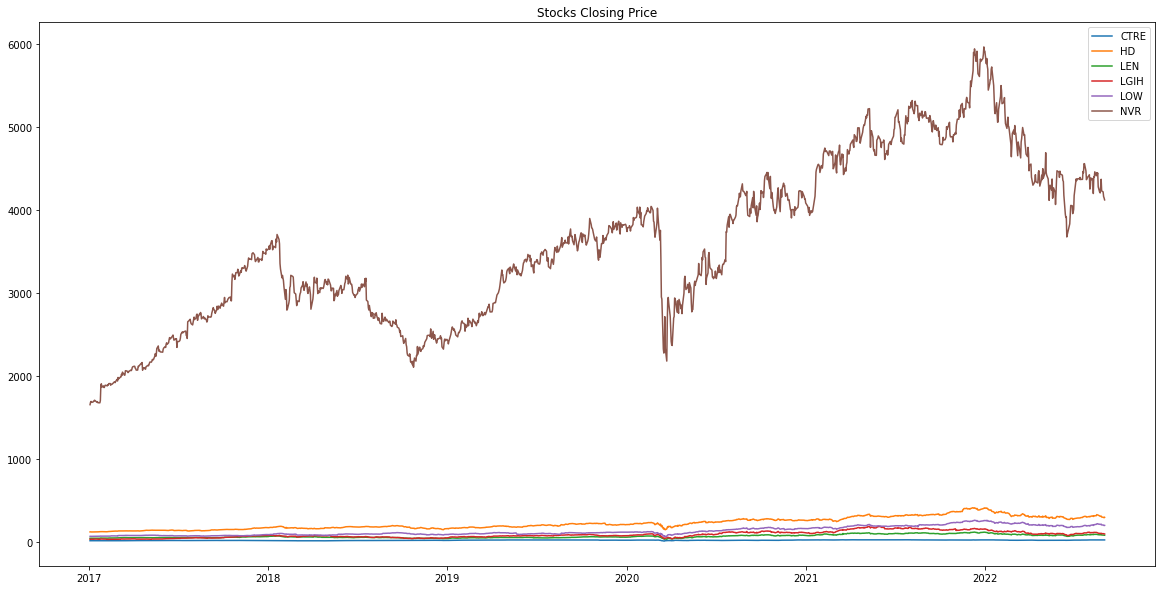

In [25]:
plt.figure(figsize=(20,10))
plt.plot(df)
plt.title('Stocks Closing Price')
plt.legend(labels=df.columns, loc='best')

In [26]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

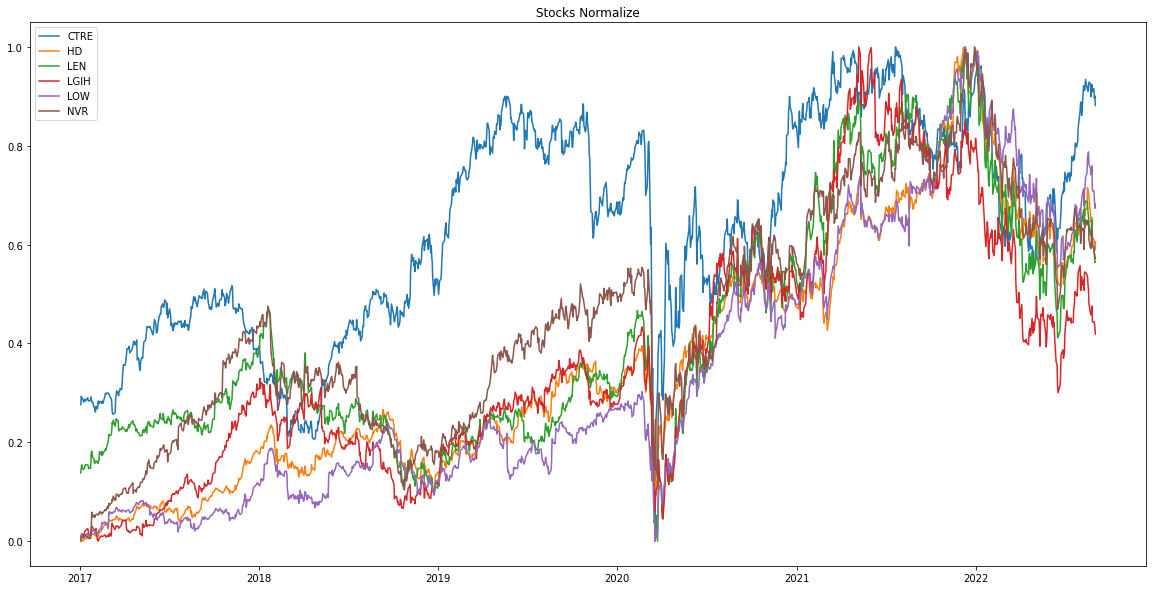

In [27]:
plt.figure(figsize=(20,10))
plt.plot(normalize)
plt.title('Stocks Normalize')
plt.legend(labels=normalize.columns, loc='best')

In [28]:
df.describe()

,CTRE,HD,LEN,LGIH,LOW,NVR
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000
mean,16.927642,222.734546,64.770769,85.073364,128.680701,3583.308873
std,3.375493,71.749922,20.222188,38.869061,53.150270,979.647882
min,6.905994,116.689674,28.427807,27.400000,62.453320,1649.989990
25%,14.191189,164.983727,49.193975,56.945000,86.528336,2774.145020
50%,17.028563,204.418701,57.152603,73.959999,106.623283,3468.149902
75%,19.988637,278.639053,78.917713,111.910000,176.401779,4363.700195
max,22.789928,408.422424,115.333504,183.360001,258.004639,5959.330078


In [29]:
# Minimum Price 
df.min()

CTRE       6.905994
HD       116.689674
LEN       28.427807
LGIH      27.400000
LOW       62.453320
NVR     1649.989990
dtype: float64

In [30]:
# Maximum Price
df.max()

CTRE      22.789928
HD       408.422424
LEN      115.333504
LGIH     183.360001
LOW      258.004639
NVR     5959.330078
dtype: float64

In [31]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,CTRE Return,HD Return,LEN Return,LGIH Return,LOW Return,NVR Return
Date,,,,,,
2017-01-04,0.023560,0.008860,0.024697,0.013199,0.012121,0.017443
2017-01-05,-0.004476,-0.011808,0.010004,0.018512,-0.010305,0.006332
2017-01-06,-0.000642,-0.002763,-0.016434,-0.002693,-0.001688,-0.006689
2017-01-09,-0.010925,0.005842,-0.003204,-0.023625,0.001691,0.002026


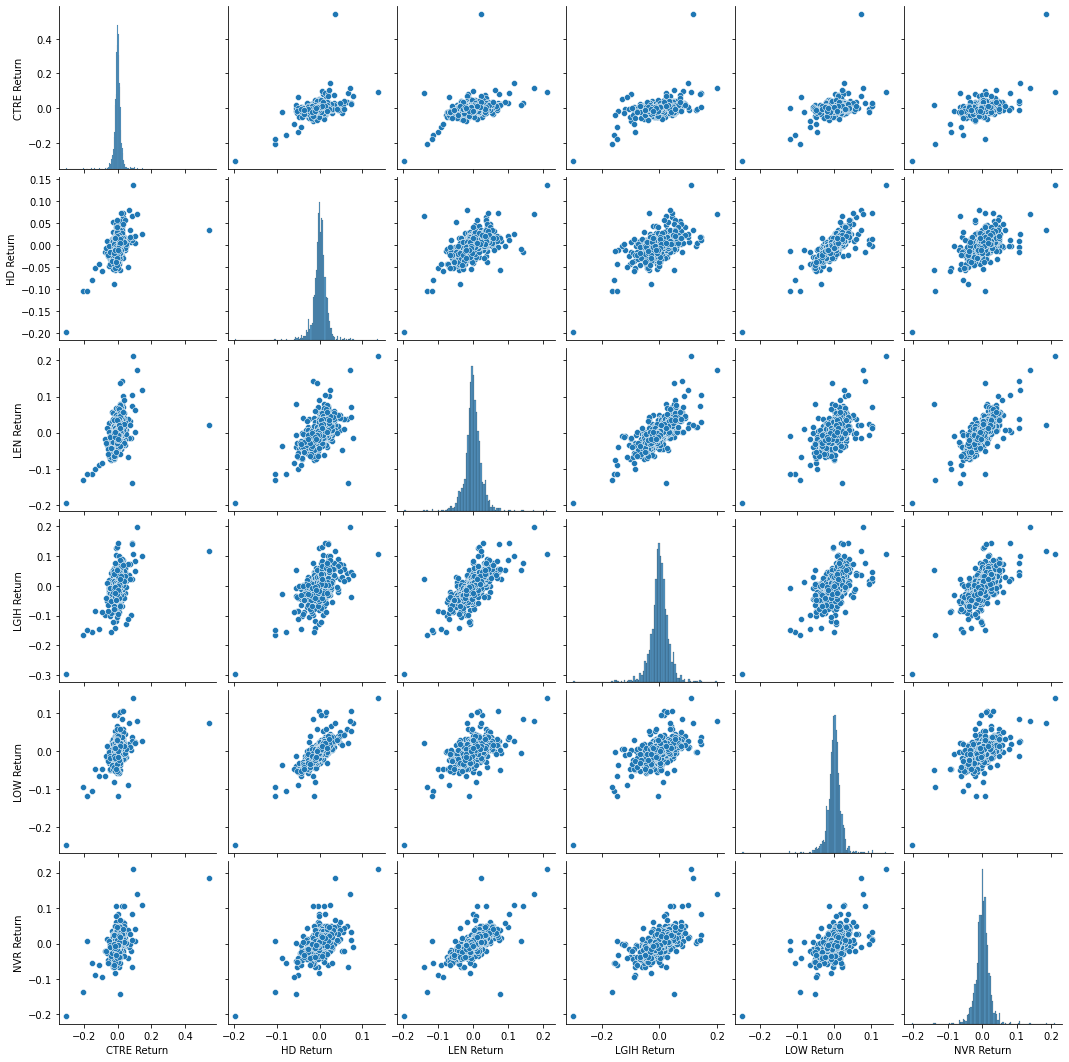

In [32]:
sns.pairplot(returns[1:])

<AxesSubplot:>

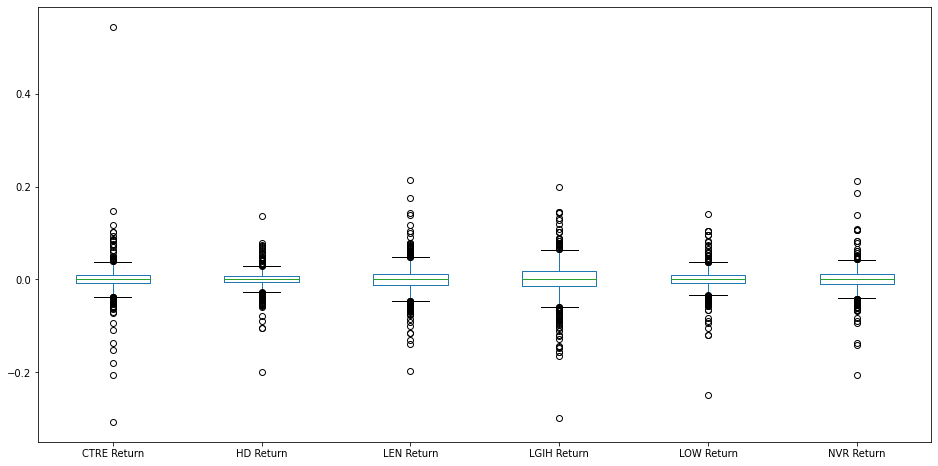

In [33]:
returns.plot(kind='box',figsize=(16,8))

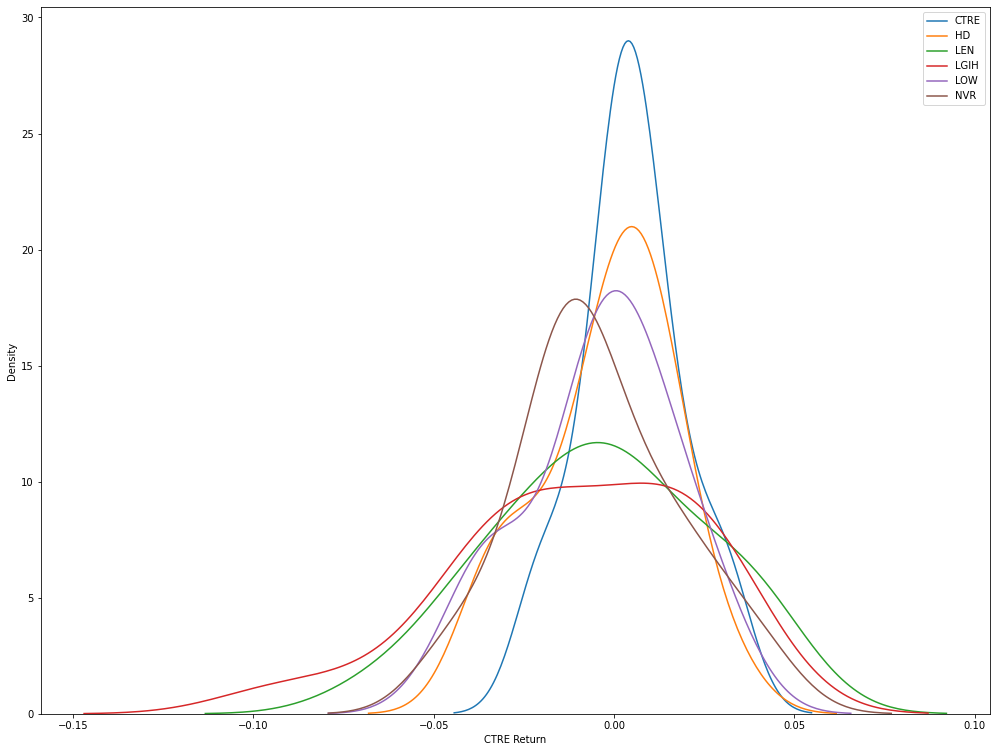

In [34]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2022-03-01" : "2022-03-31 "][r])
    plt.legend(labels=symbols)

In [35]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

CTRE Return   2020-03-19
HD Return     2020-03-24
LEN Return    2020-03-24
LGIH Return   2020-04-06
LOW Return    2020-03-24
NVR Return    2020-03-24
dtype: datetime64[ns]


In [36]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

CTRE Return   2020-03-16
HD Return     2020-03-16
LEN Return    2020-03-16
LGIH Return   2020-03-16
LOW Return    2020-03-16
NVR Return    2020-03-16
dtype: datetime64[ns]


In [37]:
returns.corr()

,CTRE Return,HD Return,LEN Return,LGIH Return,LOW Return,NVR Return
CTRE Return,1.000000,0.441341,0.413039,0.451686,0.426618,0.482862
HD Return,0.441341,1.000000,0.553443,0.532318,0.806834,0.538495
LEN Return,0.413039,0.553443,1.000000,0.743922,0.558157,0.728759
LGIH Return,0.451686,0.532318,0.743922,1.000000,0.522795,0.641212
LOW Return,0.426618,0.806834,0.558157,0.522795,1.000000,0.536529
NVR Return,0.482862,0.538495,0.728759,0.641212,0.536529,1.000000


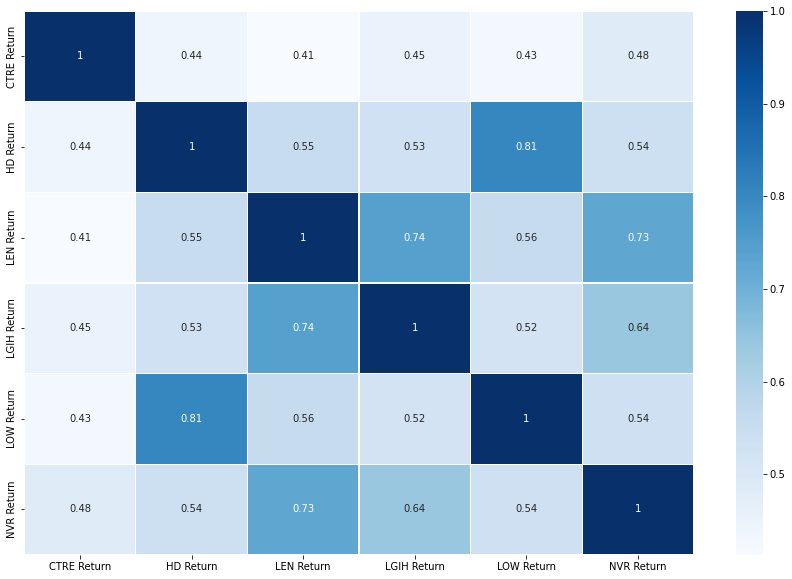

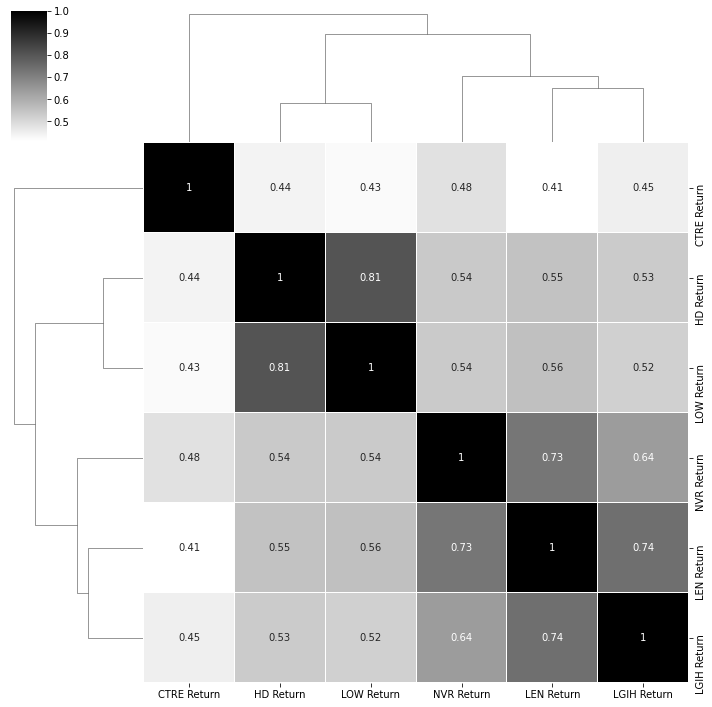

In [38]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

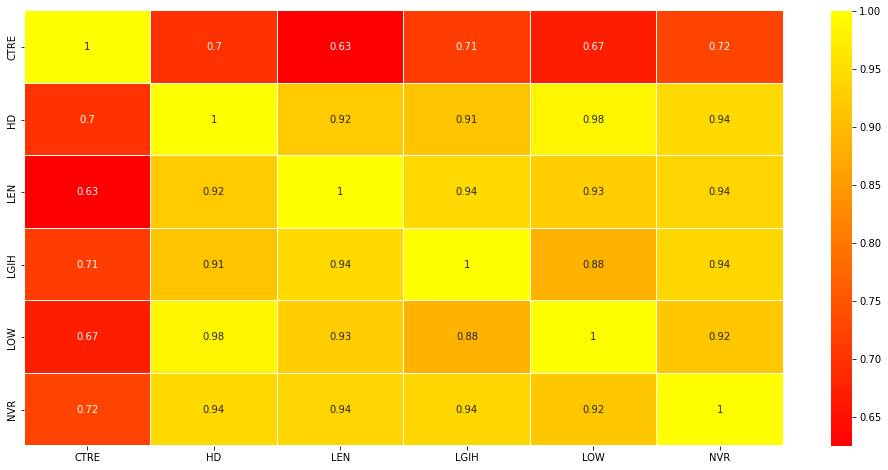

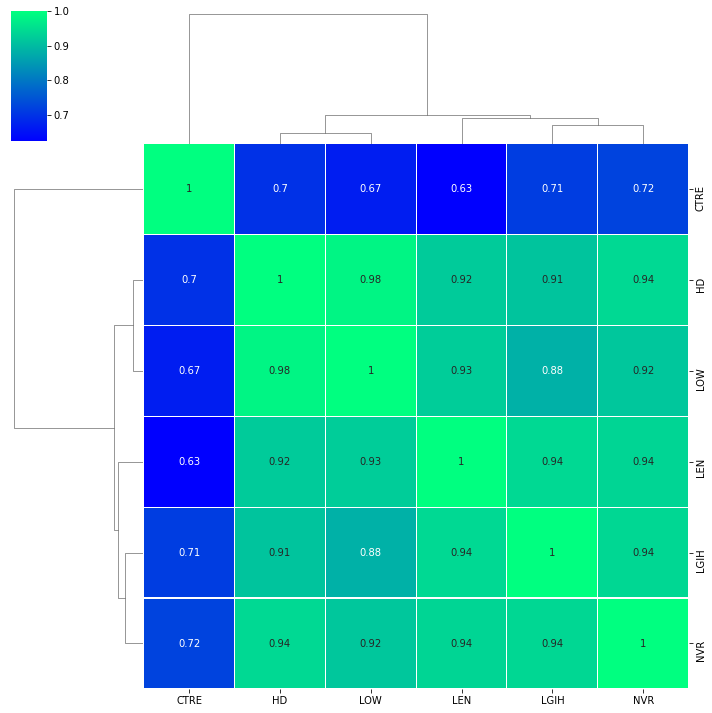

In [39]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

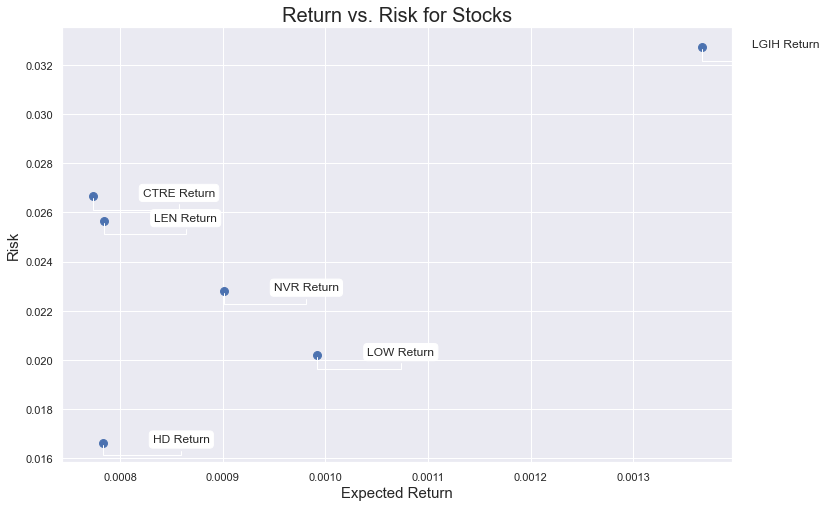

In [40]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [41]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [42]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [43]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------------------
90%                 [-0.03339068 -0.0205415  -0.03206872 -0.04054331 -0.02488509 -0.02832941]
95%                 [-0.04307578 -0.02658681 -0.0413822  -0.05242418 -0.03222095 -0.0366159 ]
99%                 [-0.06124343 -0.0379268  -0.05885274 -0.07471072 -0.04598182 -0.05215997]


In [44]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
CTRE: -0.0334
HD: -0.0205
LEN: -0.0321
LGIH: -0.0405
LOW: -0.0249
NVR: -0.0283


In [45]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 90%:
CTRE: $3000.00
HD: $2000.00
LEN: $3000.00
LGIH: $4000.00
LOW: $2000.00
NVR: $3000.00


In [46]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 99%:
CTRE: $6000.00
HD: $4000.00
LEN: $6000.00
LGIH: $7000.00
LOW: $5000.00
NVR: $5000.00
